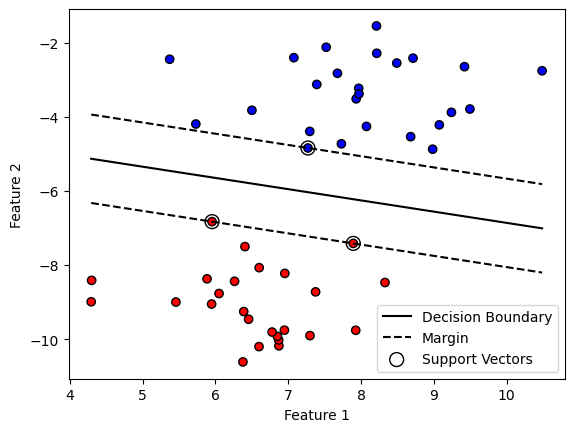

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate a linearly separable dataset
X, y = datasets.make_blobs(n_samples=50, centers=2, random_state=6)
y = np.where(y == 0, -1, 1)  # Change labels to -1 and 1 for demonstration

# Create an SVM with a linear kernel
model = SVC(kernel='linear', C=1e5)  # High C for hard margin (separable case)
model.fit(X, y)

# Get the separating hyperplane
w = model.coef_[0]
b = model.intercept_[0]
slope = -w[0] / w[1]
intercept = -b / w[1]

# Plot the decision boundary and margins
xx = np.linspace(min(X[:, 0]), max(X[:, 0]))
yy = slope * xx + intercept
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + slope ** 2) * margin
yy_up = yy + np.sqrt(1 + slope ** 2) * margin

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.plot(xx, yy, 'k-', label="Decision Boundary")
plt.plot(xx, yy_down, 'k--', label="Margin")
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolor='k', label="Support Vectors")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
